# **Fake News Prediction**

## **Data Preparation**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import scipy.sparse as sp 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import joblib
import re
import string


### Loading The Datasets

In [2]:
# Loading the true_news dataset

true_news = pd.read_csv('True.csv')
true_news.head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [3]:
# Loading the fake_news dataset

fake_news = pd.read_csv('Fake.csv')
fake_news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [4]:
# Printing the shape of each DataFrame

print("Shape of true_news dataset:", true_news.shape)
print("Shape of fake_news dataset:", fake_news.shape)

Shape of true_news dataset: (21417, 4)
Shape of fake_news dataset: (23481, 4)


In [5]:
# Printing the info of each DataFrame

print("Info of true_news dataset:")
print(true_news.info())

print("\nInfo of fake_news dataset:")
print(fake_news.info())

Info of true_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Info of fake_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [6]:
# Checking the column names of true_news dataset
print("Column names of true_news dataset:")
print(list(true_news.columns))

# Checking the column names of fake_news dataset
print("\nColumn names of fake_news dataset:")
print(list(fake_news.columns))

Column names of true_news dataset:
['title', 'text', 'subject', 'date']

Column names of fake_news dataset:
['title', 'text', 'subject', 'date']


In [7]:
#checking for duplicates in fake news dataset
fake_news.duplicated().sum()

3

In [8]:
#checking for duplicates in true news dataset
true_news.duplicated().sum()

206

In [9]:
# Identify duplicates
duplicates = fake_news[fake_news.duplicated()]

# Display duplicates
print("Fake News Duplicate Rows:")
duplicates.head()

Fake News Duplicate Rows:


title  \
9942   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
11446  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
14925  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text   subject  \
9942   No time to waste   we've got to fight with eve...  politics   
11446   Who is silencing political speech, physically...  politics   
14925  They were probably just looking for a  safe sp...  politics   

               date  
9942    Sep 9, 2017  
11446  Mar 10, 2017  
14925  Nov 16, 2015

In [10]:
# Identify duplicates
duplicates = true_news[true_news.duplicated()]

# Display duplicates
print("True News Duplicate Rows:")
duplicates.head()

True News Duplicate Rows:


title  \
445  Senate tax bill stalls on deficit-focused 'tri...   
778  Trump warns 'rogue regime' North Korea of grav...   
892  Republicans unveil tax cut bill, but the hard ...   
896  Trump taps Fed centrist Powell to lead U.S. ce...   
974  Two ex-Trump aides charged in Russia probe, th...   

                                                  text       subject  \
445  WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778  BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
892  WASHINGTON (Reuters) - U.S. House of Represent...  politicsNews   
896  WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   
974  WASHINGTON (Reuters) - Federal investigators p...  politicsNews   

                   date  
445  November 30, 2017   
778   November 8, 2017   
892   November 2, 2017   
896   November 2, 2017   
974   October 30, 2017

In [15]:
# Drop duplicates and update the DataFrame in place
true_news.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
true_news.shape


(21211, 4)

In [16]:
# Drop duplicates and update the DataFrame in place
fake_news.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
fake_news.shape


(23478, 4)

In [33]:
first_row_text = fake_news.loc[0, 'text']  # Accessing text of the first row
word_count = len(first_row_text.split())  # Counting words by splitting on whitespace

print("Word count of the first row in the fake news dataset:", word_count)

Word count of the first row in the fake news dataset: 495


In [35]:
first_row_text = true_news.loc[0, 'text']  # Accessing text of the first row
word_count = len(first_row_text.split())  # Counting words by splitting on whitespace

print("Word count of the first row in the true news dataset:", word_count)

Word count of the first row in the true news dataset: 749


### Checking the sum of missing values 

In [21]:
true_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [22]:
fake_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

This shows that the datasets does not have any missing values, which is beneficial for analysis and modeling tasks as it ensures there are no gaps in the data that could potentially impact the results.

#### Assigning Classes to the Dataset

In [23]:
true_news['class'] = 'True'
fake_news['class'] = 'Fake'

combined_data = pd.concat([true_news, fake_news])

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to convert 'class' into numeric labels
combined_data['class'] = label_encoder.fit_transform(combined_data['class'])


# Display a sample to check the result
combined_data.head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  class  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [27]:
# Printing value counts for the 'subject' column in the true_news dataset
print("true_news dataset:")
print(true_news['subject'].value_counts())

# Printing value counts for the 'subject' column in the fake_news dataset
print("\nfake_news dataset:")
print(fake_news['subject'].value_counts())

true_news dataset:
subject
politicsNews    11220
worldnews        9991
Name: count, dtype: int64

fake_news dataset:
subject
News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


## 3. Exploratory Data Analysis

- This stage entails thoroughly exploring and comprehending the dataset prior to employing machine learning algorithms. It plays a crucial role in tasks such as data preprocessing, selecting appropriate models, and devising strategies for evaluating model performance.

### Distribution of Subject Column

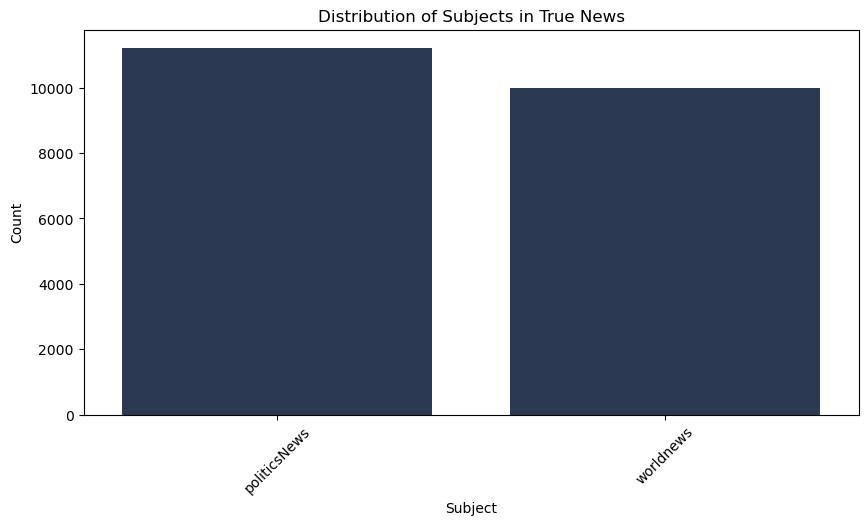

In [61]:
# Get the distribution of 'subject' in both datasets
true_subject_counts = true_news['subject'].value_counts()
fake_subject_counts = fake_news['subject'].value_counts()


# Plot the distribution for true news
plt.figure(figsize=(10, 5))
sns.barplot(x=true_subject_counts.index, y=true_subject_counts.values, color = '#253758')
plt.title('Distribution of Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



It shows the distribution of subjects in true news. The higher the count, the more news articles were about that subject.


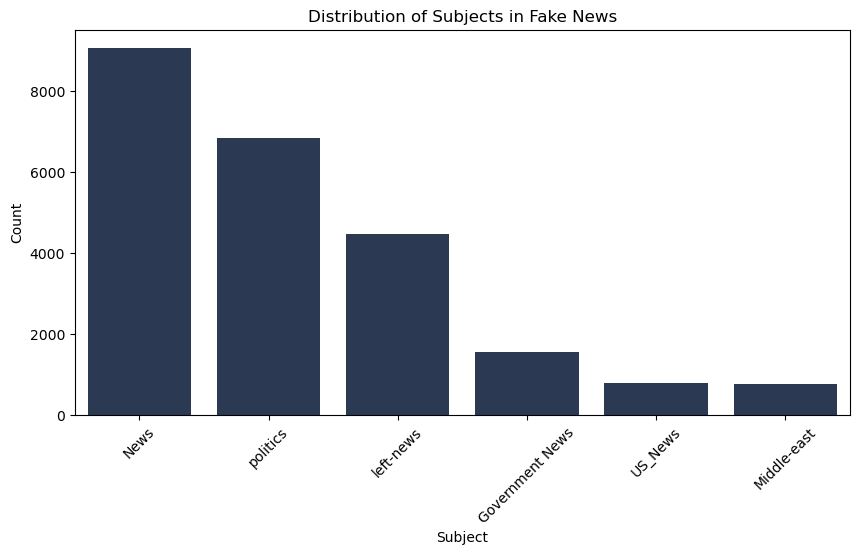

In [62]:
# Plot the distribution for fake news
plt.figure(figsize=(10, 5))
sns.barplot(x=fake_subject_counts.index, y=fake_subject_counts.values, color ='#253758')
plt.title('Distribution of Subjects in Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


It shows the distribution of subjects in fake news by content. The content is divided into a number of different categories, including news, politics, and government. The most common subjects in fake news are news, politics, and government.

### Analysis of Article Length (Word Count)


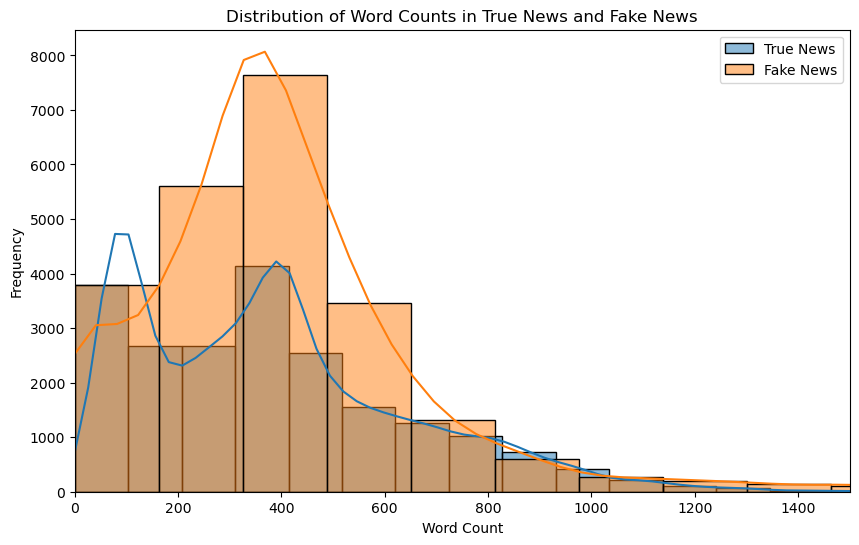

In [63]:

# Calculate word counts for both datasets
true_news['word_count'] = true_news['text'].apply(lambda x: len(x.split()))
fake_news['word_count'] = fake_news['text'].apply(lambda x: len(x.split()))

# Create a single plot with histograms for both datasets
plt.figure(figsize=(10, 6))
sns.histplot(true_news, x='word_count', kde='True', alpha=0.5, label='True News', bins=50)
sns.histplot(data=fake_news, x='word_count', kde='True', alpha=0.5, label='Fake News', bins=50)
plt.title('Distribution of Word Counts in True News and Fake News' )
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 1500)
plt.legend()
plt.show()


- This  aims to visually compare the distribution of word counts between true and fake news datasets.

### Investigate Relationships between Subject and Class

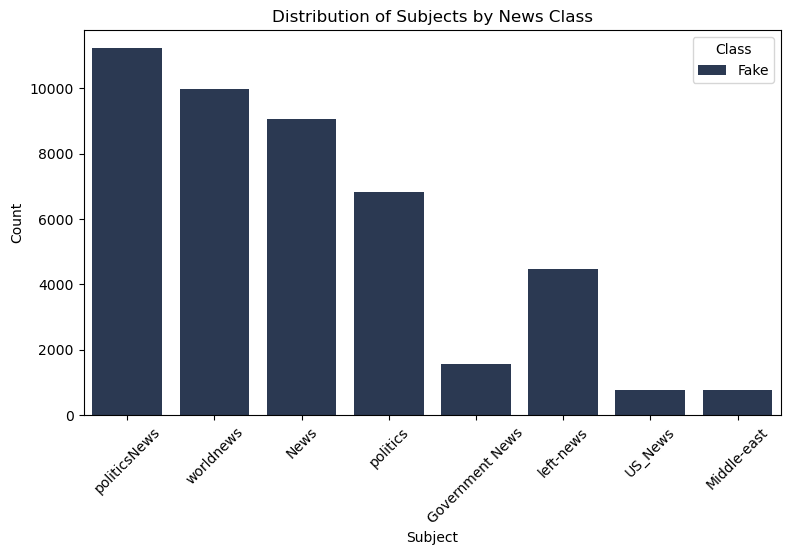

In [28]:

# Plot the relationship between 'subject' and 'class' using count plot
plt.figure(figsize=(9, 5))
sns.countplot(data=combined_data, x='subject', color='#253758')
plt.title("Distribution of Subjects by News Class")
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Fake', 'True'])
plt.show()


There were more news stories about politics than any other subject. Politics news stories are broken down further into subcategories, such as Government News, World News, and US News.

###  Checking for Class Imbalance

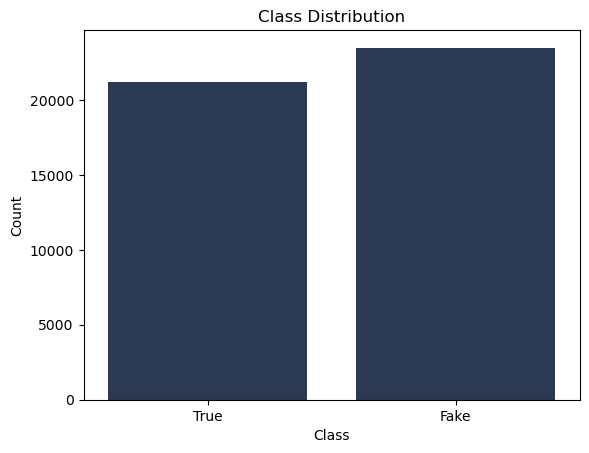

In [70]:
# Check the count of each class
class_distribution = combined_data['class'].value_counts()

# Plot the distribution to visualize any imbalance
sns.countplot(combined_data, x='class', color='#253758')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- The distribution between the two classes  is approximately even.

## 4. Text Preprocessing

Text processing helps to prepare the text data for further analysis or modeling by cleaning it and reducing each word to its base form through stemming or lemmatization.

In [65]:
# Setup for stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def remove_punctuation(text):   
    text = unicodedata.normalize('NFKD', text)
    extra_punctuation = '“”‘’—–' 
    punctuation = string.punctuation + extra_punctuation
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)

def preprocess_text(text):
    text = text.lower()
    text = remove_punctuation(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [67]:
# Apply the preprocess_text function to your DataFrame columns
true_news['text'] = true_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

In [77]:
# Tokenize and remove stop words for true news
true_tokens = [word for text in true_news['text'] for word in text.split() if word not in stop_words]

# Tokenize and remove stop words for fake news
fake_tokens = [word for text in fake_news['text'] for word in text.split() if word not in stop_words]

### Visualization: Word Clouds

Text(0.5, 1.0, 'Word Cloud for True News')

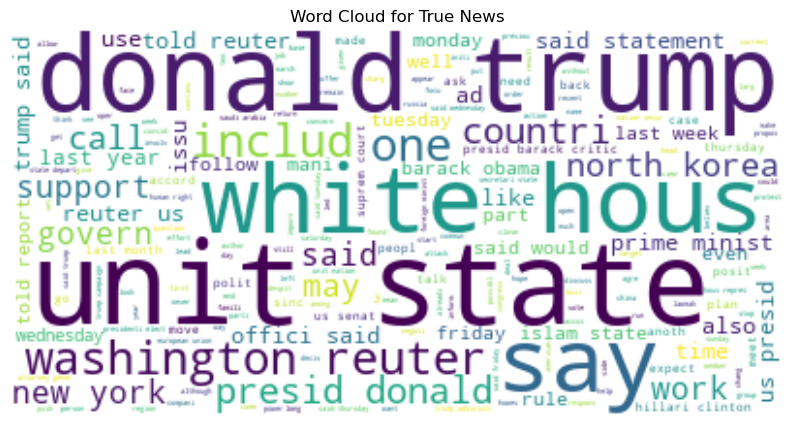

In [78]:
# Create a word cloud for true news
wordcloud_true = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(true_tokens))

# Create a word cloud for fake news
wordcloud_fake = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(fake_tokens))

# Plot word clouds
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')

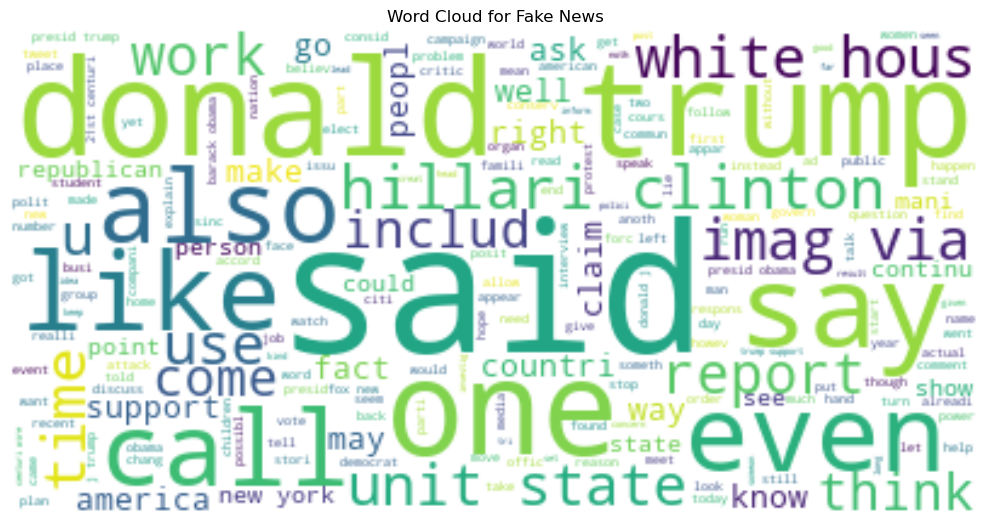

In [79]:
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')

plt.tight_layout()
plt.show()

#### Most Common Words in True News And Fake News

In [80]:
# Create word frequency counters
true_word_count = Counter(true_tokens)
fake_word_count = Counter(fake_tokens)

# Most common words in each dataset
most_common_true = true_word_count.most_common(10)
most_common_fake = fake_word_count.most_common(10)

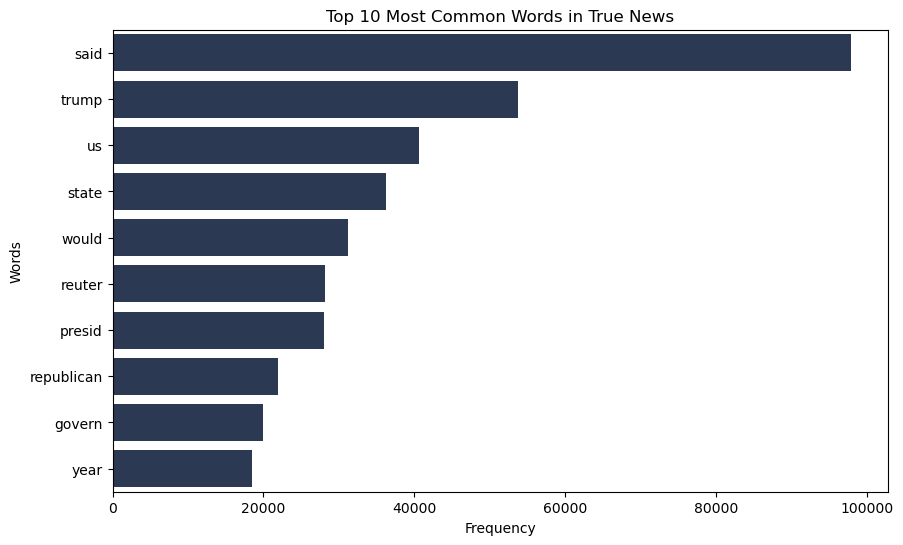

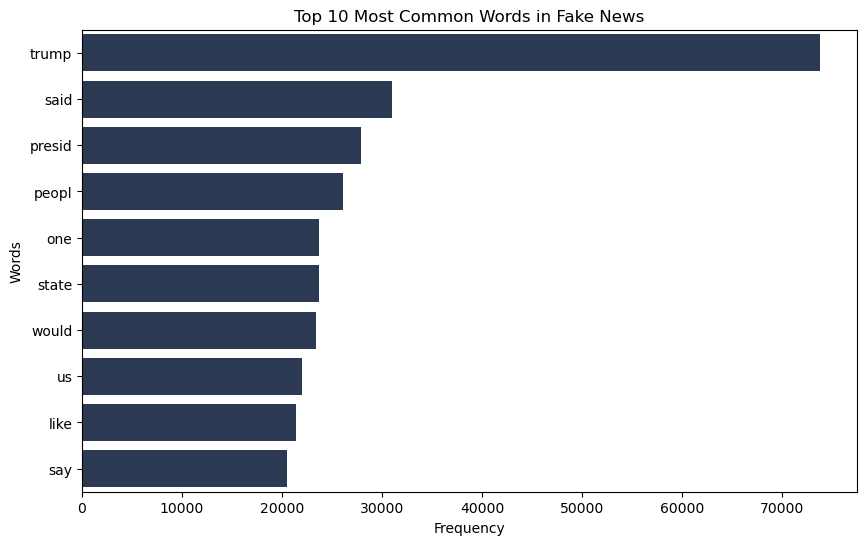

In [81]:
# Create bar plots for the most common words in true news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_true[:10]], y=[x[0] for x in most_common_true[:10]], color='#253758')
plt.title('Top 10 Most Common Words in True News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Create bar plots for the most common words in fake news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_fake[:10]], y=[x[0] for x in most_common_fake[:10]], color='#253758')
plt.title('Top 10 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()



- This indicates some of the most common words in both datasets are related to politics and Donald Trump. 

## 5. Modeling
### Model Training

In [82]:
vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(true_news['text'])
X_fake = vectorizer.transform(fake_news['text'])
X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])   

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Logistic Regression

In [84]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [85]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9953009621839337


- These metrics suggest that the baseline model (logistic regression model) is performing exceptionally well in identifying fake news. 

### Long Short Term Memory Networks (LSTM)


In [86]:
# Define maximum vocabulary size and sequence length
vocab_size = 5000
max_len = 100 

# Instantiate tokenizer and fit on text data (both real and fake)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(np.concatenate([true_news['text'], fake_news['text']]))

# Convert text data to sequences
X_real_seq = tokenizer.texts_to_sequences(true_news['text'])
X_fake_seq = tokenizer.texts_to_sequences(fake_news['text'])

# Pad sequences to ensure they have the same length
X_real_seq = pad_sequences(X_real_seq, maxlen=max_len)
X_fake_seq = pad_sequences(X_fake_seq, maxlen=max_len)

# Concatenate the sequences and create target labels
X_seq = np.concatenate([X_real_seq, X_fake_seq])
y_seq = np.concatenate([np.ones(len(X_real_seq)), np.zeros(len(X_fake_seq))])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [87]:
model = Sequential()
model.add(Embedding(vocab_size, 128))  
model.add(LSTM(64, return_sequences=True)) 
model.add(Dropout(0.5))
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid'))

# Compile the model and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 104s 88ms/step - accuracy: 0.9218 - loss: 0.1895 - val_accuracy: 0.9762 - val_loss: 0.0671
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 94s 84ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9780 - val_loss: 0.0636
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 95s 85ms/step - accuracy: 0.9921 - loss: 0.0256 - val_accuracy: 0.9825 - val_loss: 0.0537
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 95s 85ms/step - accuracy: 0.9967 - loss: 0.0116 - val_accuracy: 0.9792 - val_loss: 0.0803
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 94s 84ms/step - accuracy: 0.9969 - loss: 0.0107 - val_accuracy: 0.9813 - val_loss: 0.0656


In [88]:
# Evaluate model on test set
test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9826 - loss: 0.0602
Test accuracy: [0.06564654409885406, 0.9813157320022583]


- The model achieved high accuracy during training and testing, indicating strong performance in detecting fake news. The training accuracy reached 99%, suggesting a near-perfect fit, while the test accuracy was approximately 98.13%. These results suggest that the model is effective in distinguishing between real and fake news.

### Tuning LSTM (additional LSTM layer)

In [89]:
num_epochs = 10 
batch_size = 16 
learning_rate = 0.001  
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 256), 
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a custom learning rate and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


Epoch 1/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 239s 105ms/step - accuracy: 0.9185 - loss: 0.2042 - val_accuracy: 0.9537 - val_loss: 0.1168
Epoch 2/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 262s 117ms/step - accuracy: 0.9742 - loss: 0.0794 - val_accuracy: 0.9775 - val_loss: 0.0621
Epoch 3/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 343s 154ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9815 - val_loss: 0.0535
Epoch 4/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 349s 156ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9855 - val_loss: 0.0478
Epoch 5/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 390s 160ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9828 - val_loss: 0.0623
Epoch 6/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 327s 146ms/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 0.9843 - val_loss: 0.0643
Epoch 7/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 316s 141ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.9846 - val_loss: 0.0694
Epoch 8/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 324s 145ms/step - ac

- The model achieved a test accuracy of 98.46% with a test loss of 0.088 after 10 epochs, indicating strong performance in classifying real and fake news. These results suggest effective learning, though consistent test loss across epochs implies potential room for improvement.

## Model Evaluation


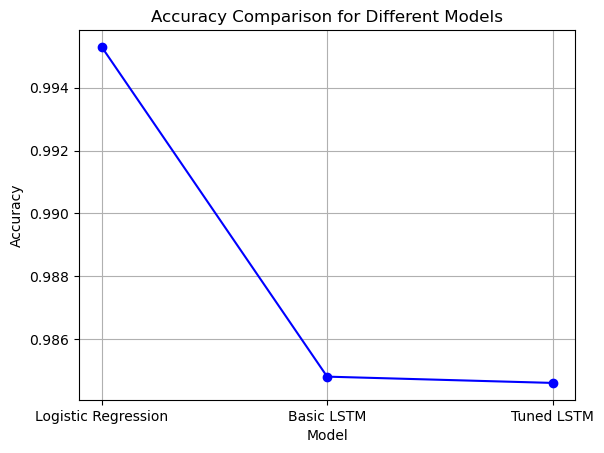

In [90]:
model_names = ['Logistic Regression', 'Basic LSTM', 'Tuned LSTM']
accuracies = [0.9953, 0.9848, 0.9846] 

# Create a line plot
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b') 
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Models')
plt.grid(True) 
plt.show()

# Saving the Model

In [37]:
# Save the trained logistic regression model
joblib.dump(LogisticRegression, 'logistic_regression_model.pkl')

# Save the CountVectorizer
joblib.dump(vectorizer, 'CountVectorizer.pkl')

['CountVectorizer.pkl']